# Notebook Summary

This notebook aims to clean and prepare restaurant review data, extract location information, normalize category scores, and calculate an overall weighted score for each restaurant. The steps include:

- Data loading and cleaning (handling nulls, fixing types)
- Extracting city and district from addresses
- Calculating review statistics and normalizing scores using min-max scaling
- Computing weighted scores based on review counts. To build the ranking, we designed a weighted scoring formula: Weighted_Score = Score × Comment_Count × Category_Ratio. The category ratio was defined as each category’s non-zero comment count divided by the total across all categories, ensuring categories with more feedback had stronger influence. 
- Visualizing results and exporting the final dataset

In [1]:
import pandas as pd
import numpy as np
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt


# Load the data
df = pd.read_csv('/Users/Serra/Desktop/bitirme/kullanılan csvler/tüm_yorumlar_labelled.csv', delimiter=";")
print("Dataset shape:", df.shape)


Dataset shape: (145845, 19)


/var/folders/dl/882n_lw53xzc_3dfm3br35d40000gn/T/ipykernel_15797/1657956561.py:9: DtypeWarning: Columns (13,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/Serra/Desktop/bitirme/kullanılan csvler/tüm_yorumlar_labelled.csv', delimiter=";")


In [2]:
df

Mekan_Adı                   Kullanıcı_Adı  \
0       pasaport_pizza_kahramankazan                  GÖNÜL M. YANIK   
1       pasaport_pizza_kahramankazan             Zahide Korkmazyiğit   
2           pasaport_pizza_pursaklar                       Burak Gül   
3           pasaport_pizza_pursaklar                     Yusuf Demir   
4                        pasa_konagi              Şule Rumeysa Çetin   
...                              ...                             ...   
145840               aydos_pastanesi                       Üzeyir A.   
145841                aykoc_restoran                     samet doğan   
145842             aynen_street_food                    Betül Atalay   
145843             aynen_street_food  eaevirgen (Evrim Anıl Evirgen)   
145844             aynen_street_food                           R.I.P   

                                                    Yorum  Puan Yorum_Tarihi  \
0       Burayı ailecek çok seviyoruz. Kızılcahamam'da ...     5   2024-07-20   
1       Ailece keyifle bu kadar lezzetli pizza yememiş...     5   2024-07-20   
2       Yeni açılan bi işletme olduğu için lezzet açıs...     5   2025-06-20   
3       Eşimle beraber karışık pizza ve hamburger sipa...     5   2025-06-20   
4       Tarhası ekmeği köftesi bazlaması her şeyimi ka...     5   2024-11-20   
...                                                   ...   ...          ...   
145840  Gerçekten bu kadar vurdum duymazlık ve özentis...     1   2024-07-20   
145841  Dün 5 kişi gelmiştik. Yanlışlık olmuş 1 kişini...     5   2024-08-20   
145842                               tek kelimeyle harika     5   2025-05-20   
145843  Tam bir fiyat/performans mekanı ve servisi çok...     5   2025-05-20   
145844                           Kalite tesadüf değildir.     5   2025-04-20   

       Restoran_Kategorisi  Restoran_Toplam_Yorum_Sayısı  \
0                 Restoran                            25   
1                 Restoran                            25   
2                 Restoran                           312   
3                 Restoran                           312   
4                 Restoran                           287   
...                    ...                           ...   
145840       Tatlı & Kahve                           654   
145841            Restoran                           265   
145842            Restoran                           208   
145843            Restoran                           208   
145844            Restoran                           208   

        Ortalama_Restoran_Puanı  \
0                           4.1   
1                           4.1   
2                           4.7   
3                           4.7   
4                           4.6   
...                         ...   
145840                      3.6   
145841                      5.0   
145842                      4.7   
145843                      4.7   
145844                      4.7   

                                          Restoran_Adresi  sentiment_score  \
0       Atatürk, Fevzi Çakmak Cd. Feride Apt No:18/1A,...         0.995875   
1       Atatürk, Fevzi Çakmak Cd. Feride Apt No:18/1A,...         0.995228   
2       Mimar Sinan, Yavuz Blv. 76/A I 80, 06145 Pursa...         0.996805   
3       Mimar Sinan, Yavuz Blv. 76/A I 80, 06145 Pursa...         0.992160   
4       İstiklal dik, Çakmak Sk. no:4, 06730 Beypazarı...         0.989068   
...                                                   ...              ...   
145840  Boğaziçi, Neşet Ertaş Cd 7/C-D, 06480 Mamak/An...        -0.999430   
145841  Ayvaşık, Şht. Halil Koçak Cd., 06730 Beypazarı...        -0.904504   
145842        Emek, Bişkek Cd. 71/A, 06490 Çankaya/Ankara         0.991108   
145843        Emek, Bişkek Cd. 71/A, 06490 Çankaya/Ankara         0.996971   
145844        Emek, Bişkek Cd. 71/A, 06490 Çankaya/Ankara         0.997376   

           label                                          AI_Result  \
0       positive  {\n  "categories": {\n    "Tat": 

# 1.1 Veri Hazırlığı & Temizlik

## 1. Null Değer Kontrolü


In [3]:
# Check null values in each column
null_counts = df.isnull().sum()
print("Null value counts per column:")
print(null_counts)

# Calculate percentage of null values
null_percentages = (null_counts / len(df)) * 100
print("\nNull value percentages per column:")
print(null_percentages)

# List columns with null values
columns_with_nulls = null_counts[null_counts > 0].index.tolist()
print("\nColumns containing null values:", columns_with_nulls)


Null value counts per column:
Mekan_Adı                            0
Kullanıcı_Adı                        1
Yorum                                0
Puan                                 0
Yorum_Tarihi                         0
Restoran_Kategorisi                  0
Restoran_Toplam_Yorum_Sayısı         0
Ortalama_Restoran_Puanı              0
Restoran_Adresi                      0
sentiment_score                     70
label                               70
AI_Result                          318
Unnamed: 0                       97451
Tat_Score                        50105
Hizmet_Score                     57915
Ortam_Score                      93588
Fiyat-Performans_Score          104056
Menü Çeşitliliği_Score          133124
Temizlik_Score                  128573
dtype: int64

Null value percentages per column:
Mekan_Adı                        0.000000
Kullanıcı_Adı                    0.000686
Yorum                            0.000000
Puan                             0.000000
Yorum_Tarihi

In [4]:
# Check where AI_Result is empty (null)
ai_result_missing = df[df['AI_Result'].isna()]

# Display count of missing AI_Result values
print(f"Number of rows where AI_Result is null: {len(ai_result_missing)}")

# Show sample of these rows with some key columns
print("\nSample rows with missing AI_Result:")
sample_cols = ['Mekan_Adı', 'Yorum', 'sentiment_score', 'label']
print(ai_result_missing[sample_cols].head(5))

# Check if specific restaurants have more missing values
print("\nTop restaurants with missing AI_Result values:")
print(ai_result_missing['Mekan_Adı'].value_counts().head(5))

Number of rows where AI_Result is null: 318

Sample rows with missing AI_Result:
                          Mekan_Adı  \
98653             tarihi_tas_mektep   
99911                  yelken_balik   
112245      divan_brasserie_kalamis   
115427  hasanpasa_konagi_restaurant   
115428  hasanpasa_konagi_restaurant   

                                                    Yorum  sentiment_score  \
98653   Tavsiye üzerine geldiğimizde tüm yemekleri cok...         0.892579   
99911   Çok şık bir balık restoranı, karşılamadan itib...         0.547794   
112245  Personel sohbet etmekten musteri ilgisi yeters...        -0.999584   
115427  15 gün önce burada yemek yedik, atmosfer sizi ...         0.993919   
115428          Eşsiz mutfak, sunum, atmosfer ve servis 😍         0.995936   

           label  
98653   positive  
99911   positive  
112245  negative  
115427  positive  
115428  positive  

Top restaurants with missing AI_Result values:
Mekan_Adı
sandzak_balkan_mutfagi                     

In [5]:
df = df.replace('', np.nan)
df = df.dropna(subset=['sentiment_score', 'label', 'AI_Result'], how='any')
null_counts = df.isnull().sum()
print("Null value counts per column:")
print(null_counts)

Null value counts per column:
Mekan_Adı                            0
Kullanıcı_Adı                        1
Yorum                                0
Puan                                 0
Yorum_Tarihi                         0
Restoran_Kategorisi                  0
Restoran_Toplam_Yorum_Sayısı         0
Ortalama_Restoran_Puanı              0
Restoran_Adresi                      0
sentiment_score                      0
label                                0
AI_Result                            0
Unnamed: 0                       97405
Tat_Score                        49772
Hizmet_Score                     57589
Ortam_Score                      93249
Fiyat-Performans_Score          103715
Menü Çeşitliliği_Score          132765
Temizlik_Score                  128206
dtype: int64


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 145457 entries, 0 to 145844
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Mekan_Adı                     145457 non-null  object 
 1   Kullanıcı_Adı                 145456 non-null  object 
 2   Yorum                         145457 non-null  object 
 3   Puan                          145457 non-null  int64  
 4   Yorum_Tarihi                  145457 non-null  object 
 5   Restoran_Kategorisi           145457 non-null  object 
 6   Restoran_Toplam_Yorum_Sayısı  145457 non-null  int64  
 7   Ortalama_Restoran_Puanı       145457 non-null  float64
 8   Restoran_Adresi               145457 non-null  object 
 9   sentiment_score               145457 non-null  float64
 10  label                         145457 non-null  object 
 11  AI_Result                     145457 non-null  object 
 12  Unnamed: 0                    48052 non-null   fl

In [7]:
col = 'Tat_Score'  # or any column you want
# Try to convert, marking errors as NaN
converted = pd.to_numeric(df[col], errors='coerce')
# Find problematic cells (where conversion failed but value is not null/empty)
problematic = df.loc[converted.isna() & df[col].notna(), col]
print("⚠️ Problematic cells that could not be converted to float:")
print(problematic)


⚠️ Problematic cells that could not be converted to float:
74764    {'Roast beef pizza': 1.0, 'Cannoli tatlısı': -...
Name: Tat_Score, dtype: object


In [8]:
# Check the type of Tat_Score in the dataframe
print("Current Tat_Score dtype:", df['Tat_Score'].dtype)

# Find and examine the problematic value at index 74764
if 74764 in df.index:
    print(f"Value at index 74764 before conversion: {df.loc[74764, 'Tat_Score']}")
    
    # Convert the specific value to float 1.0
    df.loc[74764, 'Tat_Score'] = 1.0
    
    print(f"Value at index 74764 after conversion: {df.loc[74764, 'Tat_Score']}")
    
    # Verify if the fix worked
    converted = pd.to_numeric(df['Tat_Score'], errors='coerce')
    problematic_after = df.loc[converted.isna() & df['Tat_Score'].notna(), 'Tat_Score']
    print(f"Number of problematic Tat_Score values after fix: {len(problematic_after)}")
    
    if len(problematic_after) > 0:
        print("Remaining problematic values:")
        print(problematic_after)
else:
    print("Index 74764 not found in dataframe")

Current Tat_Score dtype: object
Value at index 74764 before conversion: {'Roast beef pizza': 1.0, 'Cannoli tatlısı': -0.2}
Value at index 74764 after conversion: 1.0
Number of problematic Tat_Score values after fix: 0


In [9]:
col = 'Ortam_Score'  # Removed the extra space
# Try to convert, marking errors as NaN
converted = pd.to_numeric(df[col], errors='coerce')
# Find problematic cells (where conversion failed but value is not null/empty)
problematic = df.loc[converted.isna() & df[col].notna(), col]
print("⚠️ Problematic cells that could not be converted to float:")
print(problematic)

⚠️ Problematic cells that could not be converted to float:
116067    {'Sahili güzel': 0.9, 'Haftasonlari kalabalık ...
Name: Ortam_Score, dtype: object


In [10]:
# Fix the problematic cell in Ortam_Score column
if 116067 in df.index:
    df.loc[116067, 'Ortam_Score'] = 0.9  # Converting to float
    
    # Verify if the fix worked
    converted = pd.to_numeric(df['Ortam_Score'], errors='coerce')
    problematic_after = df.loc[converted.isna() & df['Ortam_Score'].notna(), 'Ortam_Score']
    print(f"Number of problematic Ortam_Score values after fix: {len(problematic_after)}")
    
    if len(problematic_after) > 0:
        print("Remaining problematic values:")
        print(problematic_after)
    else:
        print("All values in Ortam_Score can now be converted to float!")
else:
    print("Index 116067 not found in dataframe")

Number of problematic Ortam_Score values after fix: 0
All values in Ortam_Score can now be converted to float!


In [11]:
col = 'Fiyat-Performans_Score'  # Removed the extra space
# Try to convert, marking errors as NaN
converted = pd.to_numeric(df[col], errors='coerce')
# Find problematic cells (where conversion failed but value is not null/empty)
problematic = df.loc[converted.isna() & df[col].notna(), col]
print("⚠️ Problematic cells that could not be converted to float:")
print(problematic)

⚠️ Problematic cells that could not be converted to float:
116067    {'Uygun fiyatlı': 0.8}
Name: Fiyat-Performans_Score, dtype: object


In [12]:
# Check the type of Fiyat-Performans_Score in the dataframe
print("Current Fiyat-Performans_Score dtype:", df['Fiyat-Performans_Score'].dtype)

# Find and examine the problematic value at index 116067
if 116067 in df.index:
    print(f"Value at index 116067 before conversion: {df.loc[116067, 'Fiyat-Performans_Score']}")

    # Convert the specific value to float 0.8
    df.loc[116067, 'Fiyat-Performans_Score'] = 0.8

    print(f"Value at index 116067 after conversion: {df.loc[116067, 'Fiyat-Performans_Score']}")

    # Verify if the fix worked
    converted = pd.to_numeric(df['Fiyat-Performans_Score'], errors='coerce')
    problematic_after = df.loc[converted.isna() & df['Fiyat-Performans_Score'].notna(), 'Fiyat-Performans_Score']
    print(f"Number of problematic Fiyat-Performans_Score values after fix: {len(problematic_after)}")
    
    if len(problematic_after) > 0:
        print("Remaining problematic values:")
        print(problematic_after)
else:
    print("Index 116067 not found in dataframe")

Current Fiyat-Performans_Score dtype: object
Value at index 116067 before conversion: {'Uygun fiyatlı': 0.8}
Value at index 116067 after conversion: 0.8
Number of problematic Fiyat-Performans_Score values after fix: 0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 145457 entries, 0 to 145844
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Mekan_Adı                     145457 non-null  object 
 1   Kullanıcı_Adı                 145456 non-null  object 
 2   Yorum                         145457 non-null  object 
 3   Puan                          145457 non-null  int64  
 4   Yorum_Tarihi                  145457 non-null  object 
 5   Restoran_Kategorisi           145457 non-null  object 
 6   Restoran_Toplam_Yorum_Sayısı  145457 non-null  int64  
 7   Ortalama_Restoran_Puanı       145457 non-null  float64
 8   Restoran_Adresi               145457 non-null  object 
 9   sentiment_score               145457 non-null  float64
 10  label                         145457 non-null  object 
 11  AI_Result                     145457 non-null  object 
 12  Unnamed: 0                    48052 non-null   fl

In [14]:
cols_to_check = ['Tat_Score', 'Ortam_Score', 'Fiyat-Performans_Score']
for col in cols_to_check:
    converted = pd.to_numeric(df[col], errors='coerce')
    # Drop problematic rows
    df = df.loc[~(converted.isna() & df[col].notna())].copy()
    # Convert the column to float
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [15]:
df['Tat_Score'] = df['Tat_Score'].astype(float)
df['Ortam_Score'] = df['Ortam_Score'].astype(float)
df['Fiyat-Performans_Score'] = df['Fiyat-Performans_Score'].astype(float)

## 3. Adres Parsing (Şehir, İlçe Çıkarma)


In [16]:
import re
import unicodedata
import pandas as pd

# İl ve İlçe listeleri
IL_ILCE_MAP = {
    "Ankara": [
        "Akyurt","Altındağ","Ayaş","Balâ","Beypazarı","Çamlıdere","Çankaya","Çubuk","Elmadağ","Etimesgut",
        "Evren","Gölbaşı","Güdül","Haymana","Kahramankazan","Kalecik","Keçiören","Kızılcahamam","Mamak",
        "Nallıhan","Polatlı","Pursaklar","Sincan","Şereflikoçhisar","Yenimahalle"
    ],
    "İzmir": [
        "Aliağa","Balçova","Bayındır","Bayraklı","Bergama","Beydağ","Bornova","Buca","Çeşme","Çiğli","Dikili",
        "Foça","Gaziemir","Güzelbahçe","Karabağlar","Karaburun","Karşıyaka","Kemalpaşa","Kınık","Kiraz","Konak",
        "Menderes","Menemen","Narlıdere","Ödemiş","Seferihisar","Selçuk","Tire","Torbalı","Urla"
    ],
    "İstanbul": [
        "Adalar","Arnavutköy","Ataşehir","Avcılar","Bağcılar","Bahçelievler","Bakırköy","Başakşehir","Bayrampaşa",
        "Beşiktaş","Beykoz","Beylikdüzü","Beyoğlu","Büyükçekmece","Çatalca","Çekmeköy","Esenler","Esenyurt",
        "Eyüpsultan","Fatih","Gaziosmanpaşa","Güngören","Kadıköy","Kağıthane","Kartal","Küçükçekmece","Maltepe",
        "Pendik","Sancaktepe","Sarıyer","Şile","Silivri","Şişli","Sultanbeyli","Sultangazi","Tuzla","Ümraniye",
        "Üsküdar","Zeytinburnu"
    ]
}

# Canonical lowercase mapping for lookup
IL_CANON = {il.lower(): il for il in IL_ILCE_MAP.keys()}
ILCE_CANON = {ilce.lower(): (ilce, il) for il, ilceler in IL_ILCE_MAP.items() for ilce in ilceler}

def _norm(s: str) -> str:
    """Normalize spaces and Unicode artifacts"""
    s = unicodedata.normalize("NFKC", str(s))
    s = re.sub(r'\s+', ' ', s).strip(' ,.;-')
    return s

def extract_location_info(address: str):
    """Try to detect İlçe and İl from known lists"""
    if pd.isna(address) or not str(address).strip():
        return None, None

    addr = _norm(address).lower()

    # Önce ilçe tara
    for ilce_l, (ilce, il) in ILCE_CANON.items():
        if ilce_l in addr:
            return ilce, il

    # Sonra il tara
    for il_l, il in IL_CANON.items():
        if il_l in addr:
            return None, il

    return None, None

address_column = 'Restoran_Adresi' # change if needed
if address_column in df.columns:
    pairs = df[address_column].apply(extract_location_info)
    df[['Ilce', 'Il']] = pd.DataFrame(pairs.tolist(), index=df.index)

    # Quick sanity prints
    print("İl dağılımı (top 10):")
    print(df['Il'].value_counts(dropna=True).head(10))
    print("\nİlçe dağılımı (top 10):")
    print(df['Ilce'].value_counts(dropna=True).head(10))
else:
    print(f"Address column '{address_column}' not found. Available columns:", df.columns.tolist())

print(df)


İl dağılımı (top 10):
Il
İstanbul    65855
Ankara      62632
İzmir       16748
Name: count, dtype: int64

İlçe dağılımı (top 10):
Ilce
Çankaya        10966
Keçiören        7798
Altındağ        7704
Etimesgut       7689
Mamak           6486
Beşiktaş        6050
Beyoğlu         5642
Pursaklar       4961
Fatih           4844
Yenimahalle     4771
Name: count, dtype: int64
                           Mekan_Adı                   Kullanıcı_Adı  \
0       pasaport_pizza_kahramankazan                  GÖNÜL M. YANIK   
1       pasaport_pizza_kahramankazan             Zahide Korkmazyiğit   
2           pasaport_pizza_pursaklar                       Burak Gül   
3           pasaport_pizza_pursaklar                     Yusuf Demir   
4                        pasa_konagi              Şule Rumeysa Çetin   
...                              ...                             ...   
145840               aydos_pastanesi                       Üzeyir A.   
145841                aykoc_restoran                 

In [17]:
df.head()

Mekan_Adı        Kullanıcı_Adı  \
0  pasaport_pizza_kahramankazan       GÖNÜL M. YANIK   
1  pasaport_pizza_kahramankazan  Zahide Korkmazyiğit   
2      pasaport_pizza_pursaklar            Burak Gül   
3      pasaport_pizza_pursaklar          Yusuf Demir   
4                   pasa_konagi   Şule Rumeysa Çetin   

                                               Yorum  Puan Yorum_Tarihi  \
0  Burayı ailecek çok seviyoruz. Kızılcahamam'da ...     5   2024-07-20   
1  Ailece keyifle bu kadar lezzetli pizza yememiş...     5   2024-07-20   
2  Yeni açılan bi işletme olduğu için lezzet açıs...     5   2025-06-20   
3  Eşimle beraber karışık pizza ve hamburger sipa...     5   2025-06-20   
4  Tarhası ekmeği köftesi bazlaması her şeyimi ka...     5   2024-11-20   

  Restoran_Kategorisi  Restoran_Toplam_Yorum_Sayısı  Ortalama_Restoran_Puanı  \
0            Restoran                            25                      4.1   
1            Restoran                            25                      4.1   
2            Restoran                           312                      4.7   
3            Restoran                           312                      4.7   
4            Restoran                           287                      4.6   

                                     Restoran_Adresi  sentiment_score  ...  \
0  Atatürk, Fevzi Çakmak Cd. Feride Apt No:18/1A,...         0.995875  ...   
1  Atatürk, Fevzi Çakmak Cd. Feride Apt No:18/1A,...         0.995228  ...   
2  Mimar Sinan, Yavuz Blv. 76/A I 80, 06145 Pursa...         0.996805  ...   
3  Mimar Sinan, Yavuz Blv. 76/A I 80, 06145 Pursa...         0.992160  ...   
4  İstiklal dik, Çakmak Sk. no:4, 06730 Beypazarı...         0.989068  ...   

                                           AI_Result Unnamed: 0  Tat_Score  \
0  {\n  "categories": {\n    "Tat": 1.0,\n    "Hi...        NaN        1.0   
1  {\n  "categories": {\n    "Tat": 1.0,\n    "Hi...        NaN        1.0   
2  {\n  "categories": {\n    "Tat": 1.0,\n    "Hi...        NaN        1.0   
3  {\n    "categories": {\n        "Tat": 1.0,\n ...        NaN        1.0   
4  {\n    "categories": {\n        "Tat": 1.0,\n ...        NaN        1.0   

   Hizmet_Score  Ortam_Score  Fiyat-Performans_Score  Menü Çeşitliliği_Score  \
0           1.0          1.0                     NaN                     0.8   
1           1.0          NaN                     NaN                     NaN   
2           0.9          0.7                     NaN                     NaN   
3           1.0          NaN                     1.0                     NaN   
4           NaN          NaN                     NaN                     NaN   

   Temizlik_Score           Ilce      Il  
0             0.9  Kahramankazan  Ankara  
1             1.0  Kahramankazan  Ankara  
2             1.0      Pursaklar  Ankara  
3             NaN      Pursaklar  Ankara  
4             NaN      Beypazarı  Ankara  

[5 rows x 21 columns]

In [18]:
missing_location = df[df['Il'].isna() | df['Ilce'].isna()]
print(missing_location.to_string(index=False))

                              Mekan_Adı                       Kullanıcı_Adı                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             

In [19]:
# Manual fixes for known cases
manual_map = {
    "212_nostalji_istanbul_cafe_restaurant": ("Mahmutbey", "İstanbul"),
    "ada_mutfak": ("Büyükada", "İstanbul"),
    "aspava_mamak": ("Mamak", "Ankara"),
    "bi_sanayi_lokantasi": ("Sarıyer", "İstanbul"),
    "carpe_diem_kahvalti_ve_balik_restaurant": ("Çeşme", "İzmir"),
    "deraliye_ottoman_cuisine_restaurant": ("Sultanahmet", "İstanbul"),
    "galata_olympos_restaurant": ("Taksim", "İstanbul"),
    "kahveci_hacibaba": ("Elvankent", "Ankara"),
    "karagedik_lokantasi": ("Altındağ", "Ankara"),
    "kosem_restaurant": ("Adalar", "İstanbul"),
    "kumru_kumru": ("Çeşme", "İzmir"),
    "mona_cafe_restaurant_kordon": ("Alsancak", "İzmir"),
    "nomads": ("Fatih", "İstanbul"),
    "otto_mezze": ("Fatih", "İstanbul"),
    "pino_gare_roof_restaurant": ("Fatih", "İstanbul"),
    "sait_iskender_istinye_subesi": ("Sarıyer", "İstanbul"),
    "silasara_restaurant_cafe": ("Maltepe", "İstanbul"),
    "tugra_restaurant": ("Beşiktaş", "İstanbul"),
    "komur_turk_mutfagi": ("Küçükçekmece", "İstanbul")
}

# Apply manual fixes
for key, (ilce, il) in manual_map.items():
    mask = df['Mekan_Adı'].str.lower() == key.lower()
    df.loc[mask, ['Ilce', 'Il']] = (ilce, il)

# Drop rows that should be removed
drop_list = [
    "restoran_robinzon_jezero_modrac",
    "yemek_turk_restoran"
]
df = df[~df['Mekan_Adı'].str.lower().isin([x.lower() for x in drop_list])]

In [20]:
missing_location = df[df['Il'].isna() | df['Ilce'].isna()]
print(missing_location.to_string(index=False))

Empty DataFrame
Columns: [Mekan_Adı, Kullanıcı_Adı, Yorum, Puan, Yorum_Tarihi, Restoran_Kategorisi, Restoran_Toplam_Yorum_Sayısı, Ortalama_Restoran_Puanı, Restoran_Adresi, sentiment_score, label, AI_Result, Unnamed: 0, Tat_Score, Hizmet_Score, Ortam_Score, Fiyat-Performans_Score, Menü Çeşitliliği_Score, Temizlik_Score, Ilce, Il]
Index: []


In [21]:
df["Ilce"].value_counts()

Ilce
Çankaya        10966
Altındağ        7800
Keçiören        7798
Etimesgut       7689
Mamak           6538
               ...  
Sultanahmet       52
Mahmutbey         50
Elvankent         50
Alsancak           5
Evren              1
Name: count, Length: 75, dtype: int64

In [22]:
df["Il"].value_counts()

Il
İstanbul    65990
Ankara      62632
İzmir       16748
Name: count, dtype: int64

In [23]:
# Group by restaurant name and calculate positive review ratio
restaurant_stats = df.groupby('Mekan_Adı').agg(
    total_reviews=('Yorum', 'count'),
    positive_reviews=('label', lambda x: (x == 'positive').sum())
).reset_index()

# Calculate the ratio of positive reviews
restaurant_stats['positive_ratio'] = restaurant_stats['positive_reviews'] / restaurant_stats['total_reviews']


In [24]:
# Merge back to the original dataframe
df_with_stats = df.merge(restaurant_stats, on='Mekan_Adı', how='left')
df_with_stats

Mekan_Adı                   Kullanıcı_Adı  \
0       pasaport_pizza_kahramankazan                  GÖNÜL M. YANIK   
1       pasaport_pizza_kahramankazan             Zahide Korkmazyiğit   
2           pasaport_pizza_pursaklar                       Burak Gül   
3           pasaport_pizza_pursaklar                     Yusuf Demir   
4                        pasa_konagi              Şule Rumeysa Çetin   
...                              ...                             ...   
145365               aydos_pastanesi                       Üzeyir A.   
145366                aykoc_restoran                     samet doğan   
145367             aynen_street_food                    Betül Atalay   
145368             aynen_street_food  eaevirgen (Evrim Anıl Evirgen)   
145369             aynen_street_food                           R.I.P   

                                                    Yorum  Puan Yorum_Tarihi  \
0       Burayı ailecek çok seviyoruz. Kızılcahamam'da ...     5   2024-07-20   
1       Ailece keyifle bu kadar lezzetli pizza yememiş...     5   2024-07-20   
2       Yeni açılan bi işletme olduğu için lezzet açıs...     5   2025-06-20   
3       Eşimle beraber karışık pizza ve hamburger sipa...     5   2025-06-20   
4       Tarhası ekmeği köftesi bazlaması her şeyimi ka...     5   2024-11-20   
...                                                   ...   ...          ...   
145365  Gerçekten bu kadar vurdum duymazlık ve özentis...     1   2024-07-20   
145366  Dün 5 kişi gelmiştik. Yanlışlık olmuş 1 kişini...     5   2024-08-20   
145367                               tek kelimeyle harika     5   2025-05-20   
145368  Tam bir fiyat/performans mekanı ve servisi çok...     5   2025-05-20   
145369                           Kalite tesadüf değildir.     5   2025-04-20   

       Restoran_Kategorisi  Restoran_Toplam_Yorum_Sayısı  \
0                 Restoran                            25   
1                 Restoran                            25   
2                 Restoran                           312   
3                 Restoran                           312   
4                 Restoran                           287   
...                    ...                           ...   
145365       Tatlı & Kahve                           654   
145366            Restoran                           265   
145367            Restoran                           208   
145368            Restoran                           208   
145369            Restoran                           208   

        Ortalama_Restoran_Puanı  \
0                           4.1   
1                           4.1   
2                           4.7   
3                           4.7   
4                           4.6   
...                         ...   
145365                      3.6   
145366                      5.0   
145367                      4.7   
145368                      4.7   
145369                      4.7   

                                          Restoran_Adresi  sentiment_score  \
0       Atatürk, Fevzi Çakmak Cd. Feride Apt No:18/1A,...         0.995875   
1       Atatürk, Fevzi Çakmak Cd. Feride Apt No:18/1A,...         0.995228   
2       Mimar Sinan, Yavuz Blv. 76/A I 80, 06145 Pursa...         0.996805   
3       Mimar Sinan, Yavuz Blv. 76/A I 80, 06145 Pursa...         0.992160   
4       İstiklal dik, Çakmak Sk. no:4, 06730 Beypazarı...         0.989068   
...                                                   ...              ...   
145365  Boğaziçi, Neşet Ertaş Cd 7/C-D, 06480 Mamak/An...        -0.999430   
145366  Ayvaşık, Şht. Halil Koçak Cd., 06730 Beypazarı...        -0.904504   
145367        Emek, Bişkek Cd. 71/A, 06490 Çankaya/Ankara         0.991108   
145368        Emek, Bişkek Cd. 71/A, 06490 Çankaya/Ankara         0.996971   
145369        Emek, Bişkek Cd. 71/A, 06490 Çankaya/Ankara         0.997376   

        ... Hizmet_Score Ortam_Score  Fiyat-Performans_Score  \
0       ...          1.0         1.0                     N

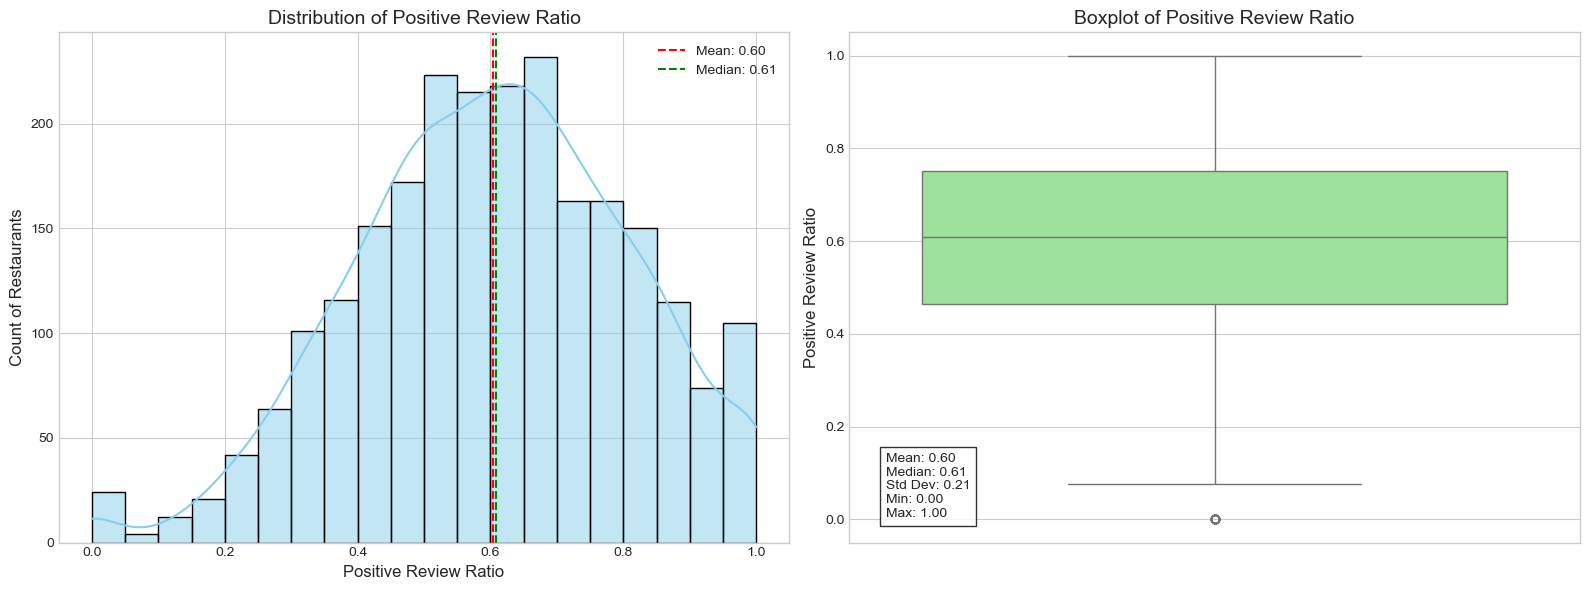

In [25]:
# Set the style for better visualization
plt.style.use('seaborn-v0_8-whitegrid')
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Histogram of positive_ratio
sns.histplot(restaurant_stats['positive_ratio'], bins=20, kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Distribution of Positive Review Ratio', fontsize=14)
axes[0].set_xlabel('Positive Review Ratio', fontsize=12)
axes[0].set_ylabel('Count of Restaurants', fontsize=12)
axes[0].axvline(x=restaurant_stats['positive_ratio'].mean(), color='red', linestyle='--', 
               label=f'Mean: {restaurant_stats["positive_ratio"].mean():.2f}')
axes[0].axvline(x=restaurant_stats['positive_ratio'].median(), color='green', linestyle='--', 
               label=f'Median: {restaurant_stats["positive_ratio"].median():.2f}')
axes[0].legend()

# Boxplot of positive_ratio
sns.boxplot(y=restaurant_stats['positive_ratio'], ax=axes[1], color='lightgreen')
axes[1].set_title('Boxplot of Positive Review Ratio', fontsize=14)
axes[1].set_ylabel('Positive Review Ratio', fontsize=12)

# Add some statistics as text
stats_text = (f"Mean: {restaurant_stats['positive_ratio'].mean():.2f}\n"
              f"Median: {restaurant_stats['positive_ratio'].median():.2f}\n"
              f"Std Dev: {restaurant_stats['positive_ratio'].std():.2f}\n"
              f"Min: {restaurant_stats['positive_ratio'].min():.2f}\n"
              f"Max: {restaurant_stats['positive_ratio'].max():.2f}")
axes[1].text(0.05, 0.05, stats_text, transform=axes[1].transAxes, 
            bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

In [26]:
df_with_stats.columns

Index(['Mekan_Adı', 'Kullanıcı_Adı', 'Yorum', 'Puan', 'Yorum_Tarihi',
       'Restoran_Kategorisi', 'Restoran_Toplam_Yorum_Sayısı',
       'Ortalama_Restoran_Puanı', 'Restoran_Adresi', 'sentiment_score',
       'label', 'AI_Result', 'Unnamed: 0', 'Tat_Score', 'Hizmet_Score',
       'Ortam_Score', 'Fiyat-Performans_Score', 'Menü Çeşitliliği_Score',
       'Temizlik_Score', 'Ilce', 'Il', 'total_reviews', 'positive_reviews',
       'positive_ratio'],
      dtype='object')

In [27]:
df_with_stats = df_with_stats[['Mekan_Adı', 'Yorum', 'Restoran_Kategorisi', 
       'Tat_Score', 'Hizmet_Score', 'Ortam_Score',
       'Fiyat-Performans_Score', 'Menü Çeşitliliği_Score', 'Temizlik_Score',
       'Ilce', 'Il', 'total_reviews', 'positive_reviews', 'positive_ratio']]

In [28]:
df_with_stats.head()

Mekan_Adı  \
0  pasaport_pizza_kahramankazan   
1  pasaport_pizza_kahramankazan   
2      pasaport_pizza_pursaklar   
3      pasaport_pizza_pursaklar   
4                   pasa_konagi   

                                               Yorum Restoran_Kategorisi  \
0  Burayı ailecek çok seviyoruz. Kızılcahamam'da ...            Restoran   
1  Ailece keyifle bu kadar lezzetli pizza yememiş...            Restoran   
2  Yeni açılan bi işletme olduğu için lezzet açıs...            Restoran   
3  Eşimle beraber karışık pizza ve hamburger sipa...            Restoran   
4  Tarhası ekmeği köftesi bazlaması her şeyimi ka...            Restoran   

   Tat_Score  Hizmet_Score  Ortam_Score  Fiyat-Performans_Score  \
0        1.0           1.0          1.0                     NaN   
1        1.0           1.0          NaN                     NaN   
2        1.0           0.9          0.7                     NaN   
3        1.0           1.0          NaN                     1.0   
4        1.0           NaN          NaN                     NaN   

   Menü Çeşitliliği_Score  Temizlik_Score           Ilce      Il  \
0                     0.8             0.9  Kahramankazan  Ankara   
1                     NaN             1.0  Kahramankazan  Ankara   
2                     NaN             1.0      Pursaklar  Ankara   
3                     NaN             NaN      Pursaklar  Ankara   
4                     NaN             NaN      Beypazarı  Ankara   

   total_reviews  positive_reviews  positive_ratio  
0             15                 8        0.533333  
1             15                 8        0.533333  
2              9                 8        0.888889  
3              9                 8        0.888889  
4             96                81        0.843750

In [29]:
# Create a function to count non-null values for specific columns
def count_non_null_reviews_by_category(df):
    # Define the category columns we want to count
    category_cols = [
        'Tat_Score',
        'Hizmet_Score',
        'Ortam_Score',
        'Fiyat-Performans_Score',
        'Menü Çeşitliliği_Score',
        'Temizlik_Score'
    ]
    
    # Group by restaurant name and count non-null values for each category
    category_counts = df.groupby('Mekan_Adı')[category_cols].count().reset_index()
    
    # Rename columns to indicate these are counts of non-null reviews
    for col in category_cols:
        category_counts = category_counts.rename(
            columns={col: f"{col.replace('_Score', '')}_comment_count"}
        )
    
    # Merge with the original dataframe
    df_with_counts = df.merge(category_counts, on='Mekan_Adı', how='left')
    
    print(f"Added {len(category_cols)} new count columns")
    print("Sample of the first 5 rows with new count columns:")
    
    return df_with_counts

# Apply the function
df_with_stats = count_non_null_reviews_by_category(df_with_stats)
df_with_stats.head()


Added 6 new count columns
Sample of the first 5 rows with new count columns:


Mekan_Adı  \
0  pasaport_pizza_kahramankazan   
1  pasaport_pizza_kahramankazan   
2      pasaport_pizza_pursaklar   
3      pasaport_pizza_pursaklar   
4                   pasa_konagi   

                                               Yorum Restoran_Kategorisi  \
0  Burayı ailecek çok seviyoruz. Kızılcahamam'da ...            Restoran   
1  Ailece keyifle bu kadar lezzetli pizza yememiş...            Restoran   
2  Yeni açılan bi işletme olduğu için lezzet açıs...            Restoran   
3  Eşimle beraber karışık pizza ve hamburger sipa...            Restoran   
4  Tarhası ekmeği köftesi bazlaması her şeyimi ka...            Restoran   

   Tat_Score  Hizmet_Score  Ortam_Score  Fiyat-Performans_Score  \
0        1.0           1.0          1.0                     NaN   
1        1.0           1.0          NaN                     NaN   
2        1.0           0.9          0.7                     NaN   
3        1.0           1.0          NaN                     1.0   
4        1.0           NaN          NaN                     NaN   

   Menü Çeşitliliği_Score  Temizlik_Score           Ilce      Il  \
0                     0.8             0.9  Kahramankazan  Ankara   
1                     NaN             1.0  Kahramankazan  Ankara   
2                     NaN             1.0      Pursaklar  Ankara   
3                     NaN             NaN      Pursaklar  Ankara   
4                     NaN             NaN      Beypazarı  Ankara   

   total_reviews  positive_reviews  positive_ratio  Tat_comment_count  \
0             15                 8        0.533333                 13   
1             15                 8        0.533333                 13   
2              9                 8        0.888889                  7   
3              9                 8        0.888889                  7   
4             96                81        0.843750                 74   

   Hizmet_comment_count  Ortam_comment_count  Fiyat-Performans_comment_count  \
0                     8                    3                               6   
1                     8                    3                               6   
2                     7                    4                               2   
3                     7                    4                               2   
4                    77                   39                              15   

   Menü Çeşitliliği_comment_count  Temizlik_comment_count  
0                               1                       4  
1                               1                       4  
2                               0                       3  
3                               0                       3  
4                              11                      17

In [30]:
df = df_with_stats

In [31]:
df.drop(columns=['Yorum'], inplace=True)

In [32]:
# Group by Mekan_Adı (restaurant name)
restaurant_grouped = df.groupby('Mekan_Adı').agg({
    'Restoran_Kategorisi': 'first',
    'Tat_Score': 'mean',
    'Hizmet_Score': 'mean',
    'Ortam_Score': 'mean',
    'Fiyat-Performans_Score': 'mean',
    'Menü Çeşitliliği_Score': 'mean',
    'Temizlik_Score': 'mean',
    'Ilce': 'first',
    'Il': 'first',
    'total_reviews': 'first',
    'positive_reviews': 'first',
    'positive_ratio': 'first',
    'Tat_comment_count': 'first',  # or 'sum' if row-level counts
    'Hizmet_comment_count': 'first',
    'Ortam_comment_count': 'first',
    'Fiyat-Performans_comment_count': 'first',
    'Menü Çeşitliliği_comment_count': 'first',
    'Temizlik_comment_count': 'first'
}).reset_index()

# Show restaurant count and preview of the data
print(f"Total number of unique restaurants: {len(restaurant_grouped)}")
restaurant_grouped.head()


Total number of unique restaurants: 2365


Mekan_Adı Restoran_Kategorisi  Tat_Score  \
0               01_adana_durumluk            Restoran   0.510000   
1  01_adanali_ismail_ustanin_yeri            Restoran   0.496000   
2               06_ankara_kokorec            Restoran        NaN   
3               100_more_alsancak            Restoran   0.529412   
4            10_numara_restaurant            Restoran   0.655556   

   Hizmet_Score  Ortam_Score  Fiyat-Performans_Score  Menü Çeşitliliği_Score  \
0     -0.550000     0.700000                0.257143                     NaN   
1     -0.015625     0.436000               -0.526667               -0.215789   
2           NaN          NaN                     NaN                     NaN   
3      0.460000     0.703448               -0.406250                0.400000   
4      0.643478     0.728000                0.118182                0.920000   

   Temizlik_Score       Ilce        Il  total_reviews  positive_reviews  \
0        1.000000  Etimesgut    Ankara             56                27   
1       -0.060000    Çankaya    Ankara             88                41   
2             NaN  Pursaklar    Ankara             37                26   
3        0.911111      Konak     İzmir             57                37   
4        1.000000    Çatalca  İstanbul             42                32   

   positive_ratio  Tat_comment_count  Hizmet_comment_count  \
0        0.482143                 10                     4   
1        0.465909                 50                    32   
2        0.702703                  0                     0   
3        0.649123                 34                    40   
4        0.761905                 27                    23   

   Ortam_comment_count  Fiyat-Performans_comment_count  \
0                    1                               7   
1                   25                              30   
2                    0                               0   
3                   29                              16   
4                   25                              11   

   Menü Çeşitliliği_comment_count  Temizlik_comment_count  
0                               0                       1  
1                              19                       5  
2                               0                       0  
3                               6                       9  
4                               5                       2

In [33]:
df = restaurant_grouped

In [34]:
# float veya int tipindeki kolonları al
category_columns = [
    col for col in df.columns 
    if pd.api.types.is_float_dtype(df[col]) or pd.api.types.is_integer_dtype(df[col])
]

if category_columns:
    for col in category_columns:
        min_val = df[col].min()
        max_val = df[col].max()
        if pd.notnull(min_val) and pd.notnull(max_val) and max_val != min_val:
            # overwrite same column with normalized values
            df[col] = (df[col] - min_val) / (max_val - min_val)
            print(f"Normalized {col}: Min={df[col].min():.2f}, Max={df[col].max():.2f}")
        else:
            print(f"Skipped {col}: constant or empty values")
else:
    print("No numeric category score columns found.")

Normalized Tat_Score: Min=0.00, Max=1.00
Normalized Hizmet_Score: Min=0.00, Max=1.00
Normalized Ortam_Score: Min=0.00, Max=1.00
Normalized Fiyat-Performans_Score: Min=0.00, Max=1.00
Normalized Menü Çeşitliliği_Score: Min=0.00, Max=1.00
Normalized Temizlik_Score: Min=0.00, Max=1.00
Normalized total_reviews: Min=0.00, Max=1.00
Normalized positive_reviews: Min=0.00, Max=1.00
Normalized positive_ratio: Min=0.00, Max=1.00
Normalized Tat_comment_count: Min=0.00, Max=1.00
Normalized Hizmet_comment_count: Min=0.00, Max=1.00
Normalized Ortam_comment_count: Min=0.00, Max=1.00
Normalized Fiyat-Performans_comment_count: Min=0.00, Max=1.00
Normalized Menü Çeşitliliği_comment_count: Min=0.00, Max=1.00
Normalized Temizlik_comment_count: Min=0.00, Max=1.00


In [35]:
df.head(10)

Mekan_Adı Restoran_Kategorisi  Tat_Score  \
0                         01_adana_durumluk            Restoran   0.755000   
1            01_adanali_ismail_ustanin_yeri            Restoran   0.748000   
2                         06_ankara_kokorec            Restoran        NaN   
3                         100_more_alsancak            Restoran   0.764706   
4                      10_numara_restaurant            Restoran   0.827778   
5                     1453_osmanli_bostanli            Restoran   0.583871   
6  16_roof_swissotel_the_bosphorus_istanbul            Restoran   0.743548   
7        1983beyoglu_cikolatakahve_kecioren           Fast Food   0.700000   
8              1999_atasehir_esinin_mutfagi            Restoran   0.837681   
9                19_pide_kebap_ustanin_yeri            Restoran   0.966667   

   Hizmet_Score  Ortam_Score  Fiyat-Performans_Score  Menü Çeşitliliği_Score  \
0      0.225000     0.850000                0.628571                     NaN   
1      0.492188     0.718000                0.236667                0.392105   
2           NaN          NaN                     NaN                     NaN   
3      0.730000     0.851724                0.296875                0.700000   
4      0.821739     0.864000                0.559091                0.960000   
5      0.367347     0.753659                0.303704                0.535714   
6      0.559091     0.845000                0.220000                0.583333   
7      0.630000     0.650000                0.475000                     NaN   
8      0.850000     0.768750                0.565909                0.827273   
9      0.962500     1.000000                0.950000                     NaN   

   Temizlik_Score           Ilce        Il  total_reviews  positive_reviews  \
0        1.000000      Etimesgut    Ankara       0.282051          0.250000   
1        0.470000        Çankaya    Ankara       0.446154          0.379630   
2             NaN      Pursaklar    Ankara       0.184615          0.240741   
3        0.955556          Konak     İzmir       0.287179          0.342593   
4        1.000000        Çatalca  İstanbul       0.210256          0.296296   
5        0.457143      Karşıyaka     İzmir       0.369231          0.157407   
6        0.050000       Beşiktaş  İstanbul       0.333333          0.407407   
7        0.950000       Keçiören    Ankara       0.276923          0.370370   
8        0.831818       Ataşehir  İstanbul       0.400000          0.527778   
9        0.975000  Kahramankazan    Ankara       0.225641          0.231481   

   positive_ratio  Tat_comment_count  Hizmet_comment_count  \
0        0.482143           0.078740              0.027586   
1        0.465909           0.393701              0.220690   
2        0.702703           0.000000              0.000000   
3        0.649123           0.267717              0.275862   
4        0.761905           0.212598              0.158621   
5        0.232877           0.244094              0.337931   
6        0.666667           0.244094              0.303448   
7        0.727273           0.031496              0.034483   
8        0.721519           0.543307              0.337931   
9        0.555556           0.023622              0.027586   

   Ortam_comment_count  Fiyat-Performans_comment_count  \
0             0.010526                        0.107692   
1             0.263158                        0.461538   
2             0.000000                        0.000000   
3             0.305263                        0.246154   
4             0.263158                        0.169231   
5             0.431579                        0.415385   
6             0.421053                        0.153846   
7             0.031579                        0.030769   
8             0.168421                        0.338462   
9             0.010526                        0.046154   

   Menü Çeşitliliği_comment_count  Temizlik_comment_count  
0                        0.000000         

### BOŞ OLANLAR

In [36]:
cols = [
    "Tat_comment_count",
    "Hizmet_comment_count",
    "Ortam_comment_count",
    "Fiyat-Performans_comment_count",
    "Menü Çeşitliliği_comment_count",
    "Temizlik_comment_count"
]

# Count rows equal to 0 for each column
print((df[cols] == 0).sum())

Tat_comment_count                  39
Hizmet_comment_count               57
Ortam_comment_count               106
Fiyat-Performans_comment_count    116
Menü Çeşitliliği_comment_count    315
Temizlik_comment_count            166
dtype: int64


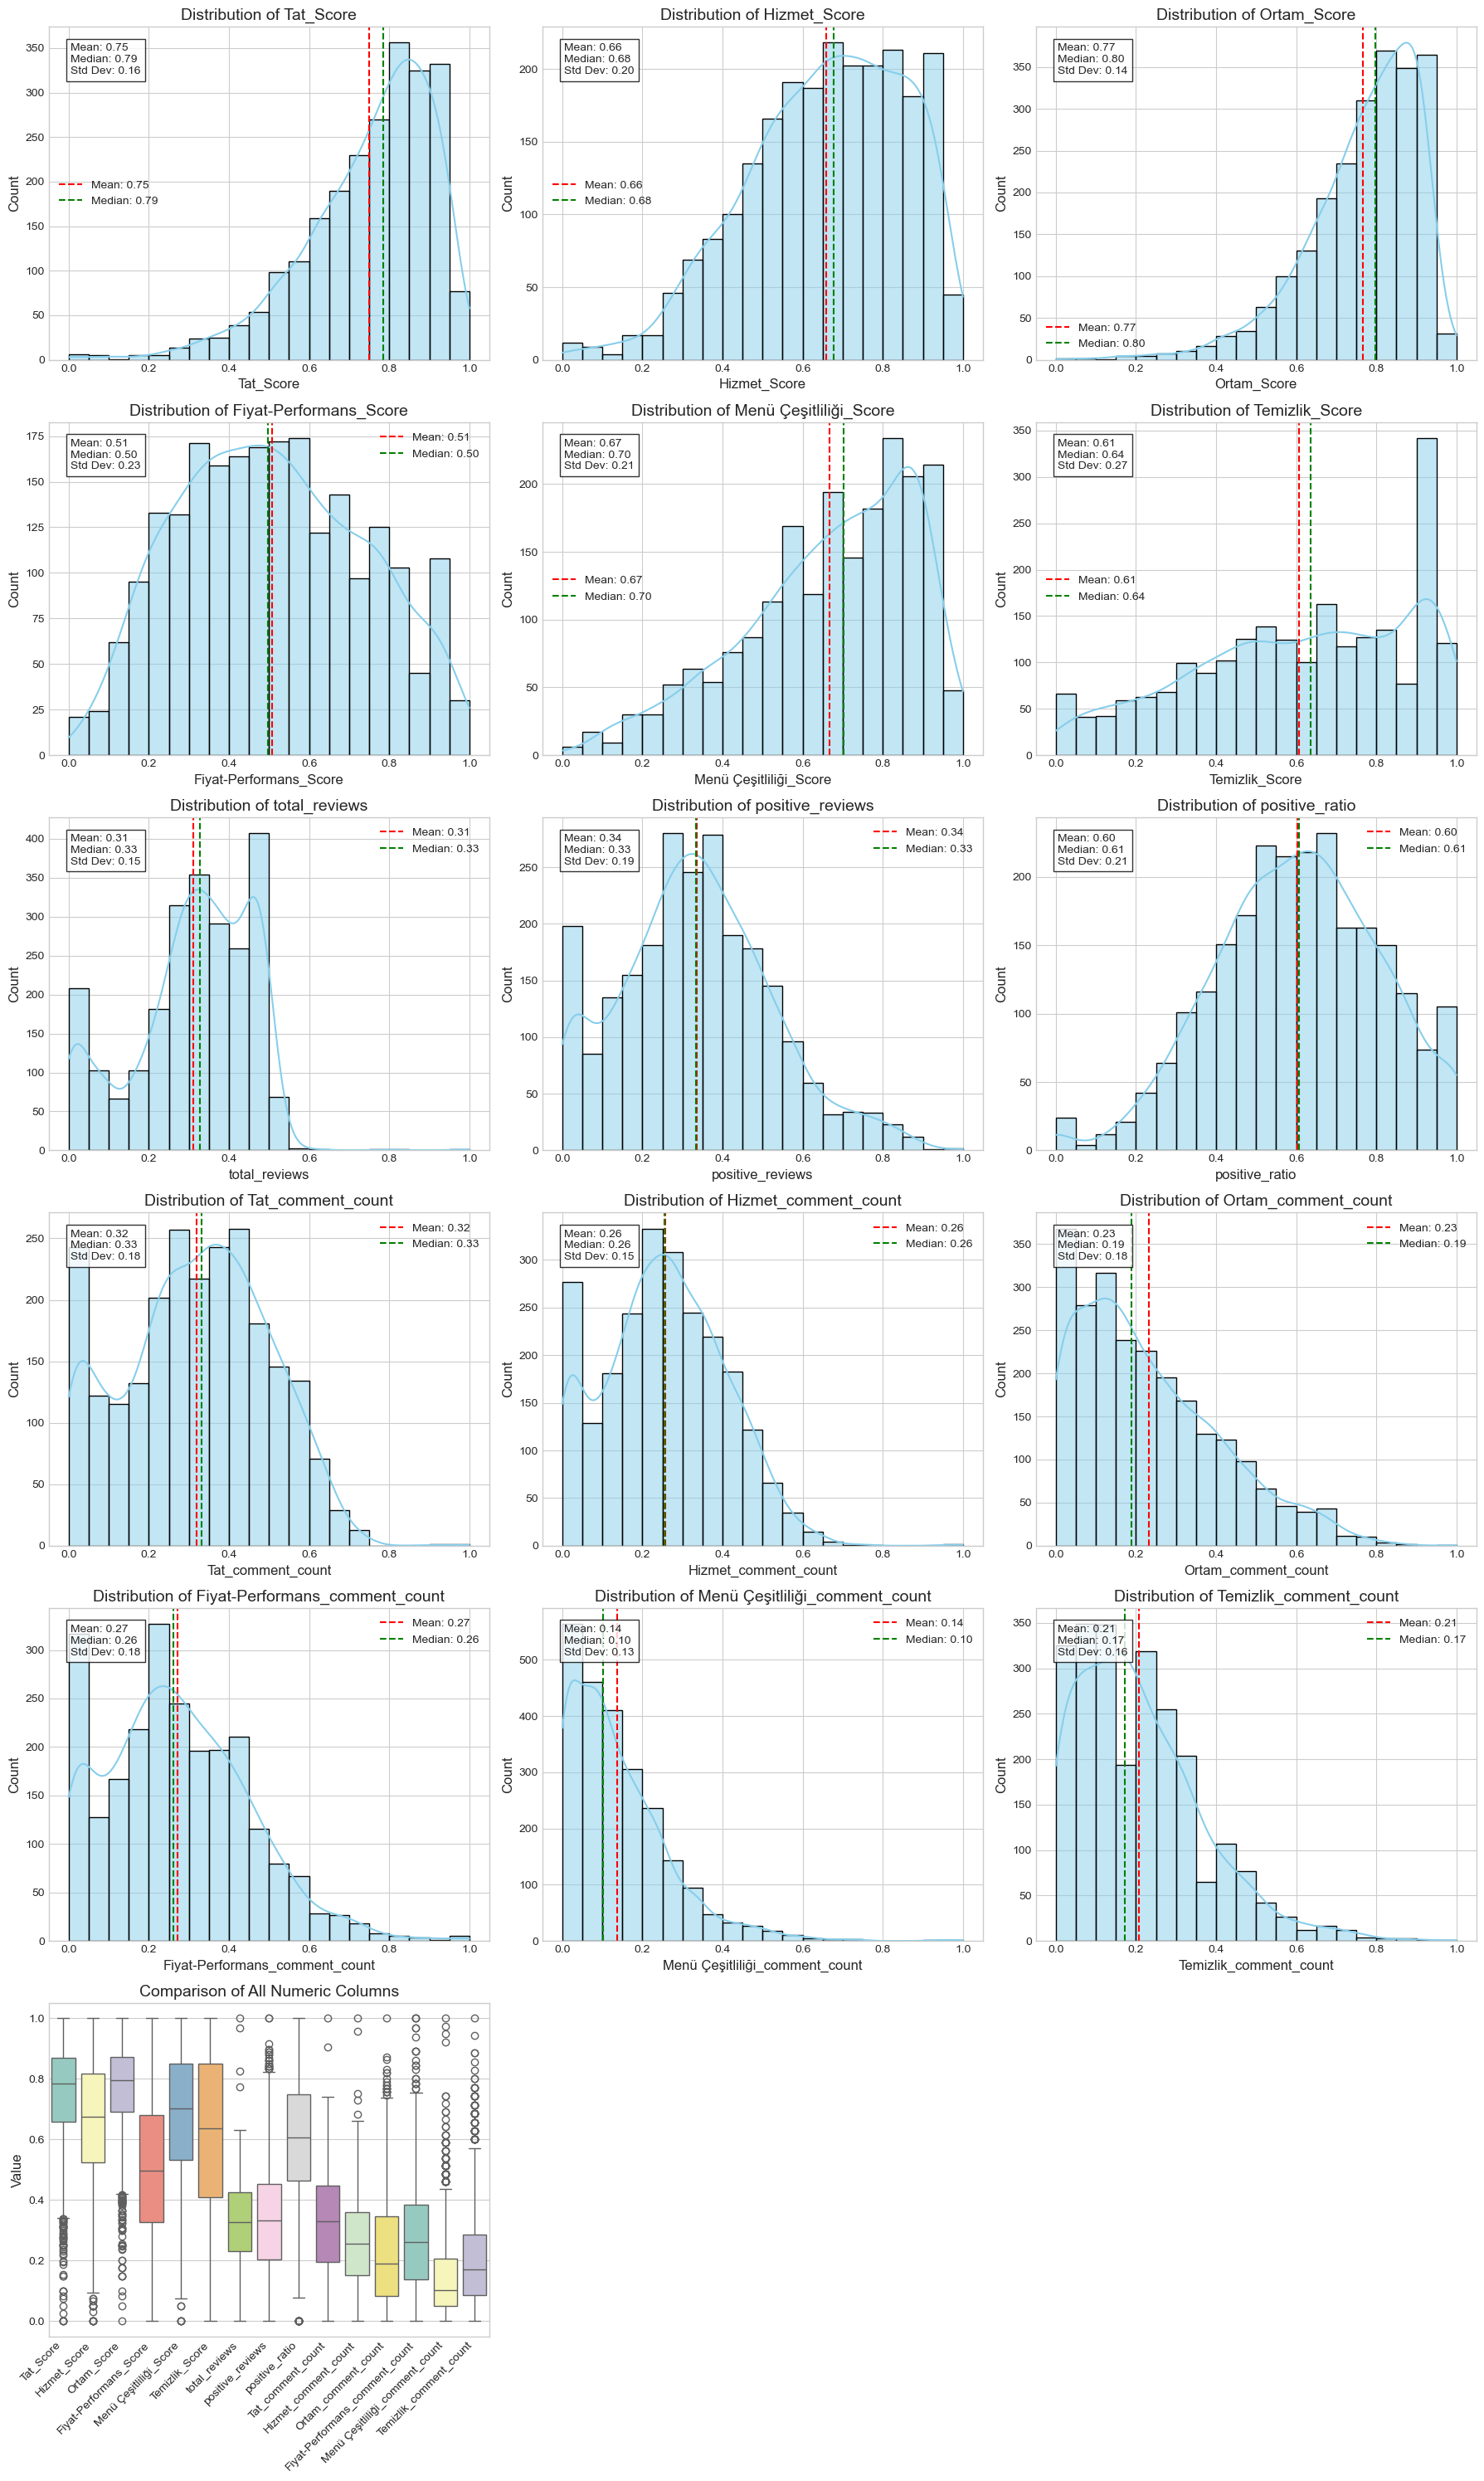

In [37]:
import math
# Stil
plt.style.use('seaborn-v0_8-whitegrid')

# Sayısal kolonlar
score_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Kaç subplot lazım? (her bir numeric kolon için 1 + 1 tane boxplot)
n_plots = len(score_columns) + 1  
n_cols = 3
n_rows = math.ceil(n_plots / n_cols)

plt.figure(figsize=(6*n_cols, 5*n_rows))

# Histogramlar
for i, column in enumerate(score_columns, 1):
    plt.subplot(n_rows, n_cols, i)
    data = df[column].dropna()
    
    if len(data) > 0:
        sns.histplot(data, kde=True, bins=20, color='skyblue')
        plt.axvline(data.mean(), color='red', linestyle='--', label=f'Mean: {data.mean():.2f}')
        plt.axvline(data.median(), color='green', linestyle='--', label=f'Median: {data.median():.2f}')
        plt.title(f'Distribution of {column}', fontsize=14)
        plt.xlabel(column, fontsize=12)
        plt.ylabel('Count', fontsize=12)
        plt.legend()
        stats_text = (f"Mean: {data.mean():.2f}\n"
                      f"Median: {data.median():.2f}\n"
                      f"Std Dev: {data.std():.2f}")
        plt.annotate(stats_text, xy=(0.05, 0.95), xycoords='axes fraction',
                   bbox=dict(facecolor='white', alpha=0.8), va='top')
    else:
        plt.text(0.5, 0.5, f"No data available for {column}", 
                ha='center', va='center', fontsize=12)

# Boxplot en sona
plt.subplot(n_rows, n_cols, n_plots)
boxplot_data = [df[col].dropna() for col in score_columns]
sns.boxplot(data=boxplot_data, palette='Set3')
plt.xticks(range(len(score_columns)), score_columns, rotation=45, ha='right')
plt.title('Comparison of All Numeric Columns', fontsize=14)
plt.ylabel('Value', fontsize=12)

plt.tight_layout()
plt.show()



### Kendi risk algılımıza göre weight yaptık

In [38]:
cols = [
    "Tat_comment_count",
    "Hizmet_comment_count",
    "Ortam_comment_count",
    "Fiyat-Performans_comment_count",
    "Menü Çeşitliliği_comment_count",
    "Temizlik_comment_count"
]
count_table = (df[cols] != 0).sum().reset_index()
print(count_table)

                            index     0
0               Tat_comment_count  2326
1            Hizmet_comment_count  2308
2             Ortam_comment_count  2259
3  Fiyat-Performans_comment_count  2249
4  Menü Çeşitliliği_comment_count  2050
5          Temizlik_comment_count  2199


In [39]:
toplam = count_table[0].sum()
toplam

13391

In [40]:
ratios = []
for i in (count_table[0]):
    ratios.append(i/toplam)


In [41]:
ratios

[0.1736987528937346,
 0.17235456649988798,
 0.16869539242774997,
 0.1679486222089463,
 0.1530878948547532,
 0.16421477111492794]

In [42]:
weight_calculation = df[["Mekan_Adı", "Ilce", "Il", "Tat_Score", "Hizmet_Score", "Ortam_Score", "Fiyat-Performans_Score", "Menü Çeşitliliği_Score", "Temizlik_Score", "Tat_comment_count", "Hizmet_comment_count", "Ortam_comment_count", "Fiyat-Performans_comment_count", "Menü Çeşitliliği_comment_count", "Temizlik_comment_count"]]
weight_calculation

Mekan_Adı           Ilce        Il  Tat_Score  \
0                     01_adana_durumluk      Etimesgut    Ankara   0.755000   
1        01_adanali_ismail_ustanin_yeri        Çankaya    Ankara   0.748000   
2                     06_ankara_kokorec      Pursaklar    Ankara        NaN   
3                     100_more_alsancak          Konak     İzmir   0.764706   
4                  10_numara_restaurant        Çatalca  İstanbul   0.827778   
...                                 ...            ...       ...        ...   
2360  zirve_soguk_baklava_kahramankazan  Kahramankazan    Ankara   0.886364   
2361   zirve_soguk_baklava_mamak_subesi          Mamak    Ankara   0.783333   
2362                  ziyafet_cig_kofte  Kahramankazan    Ankara   0.983333   
2363                   ziyafet_cigkofte  Kahramankazan    Ankara   0.962500   
2364        ziyafet_restaurant_catering         Sincan    Ankara   0.535000   

      Hizmet_Score  Ortam_Score  Fiyat-Performans_Score  \
0         0.225000     0.850000                0.628571   
1         0.492188     0.718000                0.236667   
2              NaN          NaN                     NaN   
3         0.730000     0.851724                0.296875   
4         0.821739     0.864000                0.559091   
...            ...          ...                     ...   
2360      0.964286          NaN                0.940000   
2361      0.813158     0.900000                0.694118   
2362      0.962500     0.966667                     NaN   
2363      1.000000          NaN                0.250000   
2364      0.568750     0.750000                0.100000   

      Menü Çeşitliliği_Score  Temizlik_Score  Tat_comment_count  \
0                        NaN        1.000000           0.078740   
1                   0.392105        0.470000           0.393701   
2                        NaN             NaN           0.000000   
3                   0.700000        0.955556           0.267717   
4                   0.960000        1.000000           0.212598   
...                      ...             ...                ...   
2360                0.850000             NaN           0.086614   
2361                     NaN        0.758333           0.283465   
2362                     NaN        0.970000           0.047244   
2363                0.850000             NaN           0.031496   
2364                0.225000        0.310714           0.196850   

      Hizmet_comment_count  Ortam_comment_count  \
0                 0.027586             0.010526   
1                 0.220690             0.263158   
2                 0.000000             0.000000   
3                 0.275862             0.305263   
4                 0.158621             0.263158   
...                    ...                  ...   
2360              0.048276             0.000000   
2361              0.131034             0.021053   
2362              0.027586             0.031579   
2363              0.013793             0.000000   
2364              0.110345             0.052632   

      Fiyat-Performans_comment_count  Menü Çeşitliliği_comment_count  \
0                           0.107692                        0.000000   
1                           0.461538                        0.487179   
2                           0.000000                        0.000000   
3                           0.246154                        0.153846   
4                           0.169231                        0.128205   
...                              ...                             ...   
2360                        0.076923                        0.025641   
2361                        0.261538                        0.000000   
2362                        0.000000                        0.000000   
2363                        0.030769                        0.025641   
2364                        0.092308                        0.051282   

      Temizlik_comment_count  
0                   0.028571  
1                   0.14285

In [43]:
# Create weighted scores by multiplying each score by its corresponding comment count ratio
weight_calculation['Weighted_Tat'] = weight_calculation['Tat_Score'] * weight_calculation['Tat_comment_count'] * ratios[0]
weight_calculation['Weighted_Hizmet'] = weight_calculation['Hizmet_Score'] * weight_calculation['Hizmet_comment_count'] * ratios[1]
weight_calculation['Weighted_Ortam'] = weight_calculation['Ortam_Score'] * weight_calculation['Ortam_comment_count'] * ratios[2]
weight_calculation['Weighted_Fiyat'] = weight_calculation['Fiyat-Performans_Score'] * weight_calculation['Fiyat-Performans_comment_count'] * ratios[3]
weight_calculation['Weighted_Menu'] = weight_calculation['Menü Çeşitliliği_Score'] * weight_calculation['Menü Çeşitliliği_comment_count'] * ratios[4]
weight_calculation['Weighted_Temizlik'] = weight_calculation['Temizlik_Score'] * weight_calculation['Temizlik_comment_count'] * ratios[5]

# Calculate total weighted score (ignoring NaN values)
weight_calculation['Total_Weighted_Score'] = weight_calculation[[
    'Weighted_Tat', 'Weighted_Hizmet', 'Weighted_Ortam',
    'Weighted_Fiyat', 'Weighted_Menu', 'Weighted_Temizlik'
]].sum(axis=1, skipna=True)

/var/folders/dl/882n_lw53xzc_3dfm3br35d40000gn/T/ipykernel_15797/1792614262.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weight_calculation['Weighted_Tat'] = weight_calculation['Tat_Score'] * weight_calculation['Tat_comment_count'] * ratios[0]
/var/folders/dl/882n_lw53xzc_3dfm3br35d40000gn/T/ipykernel_15797/1792614262.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weight_calculation['Weighted_Hizmet'] = weight_calculation['Hizmet_Score'] * weight_calculation['Hizmet_comment_count'] * ratios[1]
/

In [44]:
# Display first few rows with new columns
weight_calculation.head()

Mekan_Adı       Ilce        Il  Tat_Score  \
0               01_adana_durumluk  Etimesgut    Ankara   0.755000   
1  01_adanali_ismail_ustanin_yeri    Çankaya    Ankara   0.748000   
2               06_ankara_kokorec  Pursaklar    Ankara        NaN   
3               100_more_alsancak      Konak     İzmir   0.764706   
4            10_numara_restaurant    Çatalca  İstanbul   0.827778   

   Hizmet_Score  Ortam_Score  Fiyat-Performans_Score  Menü Çeşitliliği_Score  \
0      0.225000     0.850000                0.628571                     NaN   
1      0.492188     0.718000                0.236667                0.392105   
2           NaN          NaN                     NaN                     NaN   
3      0.730000     0.851724                0.296875                0.700000   
4      0.821739     0.864000                0.559091                0.960000   

   Temizlik_Score  Tat_comment_count  ...  Fiyat-Performans_comment_count  \
0        1.000000           0.078740  ...                        0.107692   
1        0.470000           0.393701  ...                        0.461538   
2             NaN           0.000000  ...                        0.000000   
3        0.955556           0.267717  ...                        0.246154   
4        1.000000           0.212598  ...                        0.169231   

   Menü Çeşitliliği_comment_count  Temizlik_comment_count  Weighted_Tat  \
0                        0.000000                0.028571      0.010326   
1                        0.487179                0.142857      0.051152   
2                        0.000000                0.000000           NaN   
3                        0.153846                0.257143      0.035560   
4                        0.128205                0.057143      0.030568   

   Weighted_Hizmet  Weighted_Ortam  Weighted_Fiyat  Weighted_Menu  \
0         0.001070        0.001509        0.011369            NaN   
1         0.018721        0.031875        0.018345       0.029244   
2              NaN             NaN             NaN            NaN   
3         0.034709        0.043861        0.012273       0.016486   
4         0.022466        0.038356        0.015891       0.018842   

   Weighted_Temizlik  Total_Weighted_Score  
0           0.004692              0.028966  
1           0.011026              0.160363  
2                NaN              0.000000  
3           0.040350              0.183239  
4           0.009384              0.135506  

[5 rows x 22 columns]

In [45]:
# Display first few rows with new columns
weight_calculation["Total_Weighted_Score"].describe()

count    2365.000000
mean        0.155954
std         0.087885
min         0.000000
25%         0.097024
50%         0.156016
75%         0.213557
max         0.484303
Name: Total_Weighted_Score, dtype: float64

In [46]:
weight_calculation[weight_calculation["Total_Weighted_Score"] == 0.0]

Mekan_Adı           Ilce        Il  \
2                                  06_ankara_kokorec      Pursaklar    Ankara   
15                                     2a_durum_kafe  Kahramankazan    Ankara   
26    52_karadeniz_balik_lokantasi_balik_satis_manav      Etimesgut    Ankara   
40                                  aciktim_parkcafe      Beypazarı    Ankara   
92                            aksoylar_konagi_tarihi        Kalecik    Ankara   
287                                   aykoc_restoran      Beypazarı    Ankara   
939                                    elsev_lokanta        Elmadağ    Ankara   
1087                                  gunay_restoran        Sarıyer  İstanbul   
1467                            koroglu_kiraathanesi      Beypazarı    Ankara   
1957             pursaklar_mevlana_pide_kebap_salonu      Pursaklar    Ankara   

      Tat_Score  Hizmet_Score  Ortam_Score  Fiyat-Performans_Score  \
2           NaN           NaN          NaN                     NaN   
15          NaN           NaN          NaN                     NaN   
26          NaN           NaN          NaN                     NaN   
40          NaN           NaN          NaN                     NaN   
92          NaN           NaN          NaN                     NaN   
287         NaN           NaN          NaN                     NaN   
939         NaN           NaN          NaN                     NaN   
1087        NaN           NaN          NaN                     NaN   
1467        NaN           NaN          NaN                     NaN   
1957        0.0           0.0          NaN                     NaN   

      Menü Çeşitliliği_Score  Temizlik_Score  Tat_comment_count  ...  \
2                        NaN             NaN           0.000000  ...   
15                       NaN             NaN           0.000000  ...   
26                       NaN             NaN           0.000000  ...   
40                       NaN             NaN           0.000000  ...   
92                       NaN             NaN           0.000000  ...   
287                      NaN             NaN           0.000000  ...   
939                      NaN             NaN           0.000000  ...   
1087                     NaN             NaN           0.000000  ...   
1467                     NaN             NaN           0.000000  ...   
1957                     NaN             NaN           0.007874  ...   

      Fiyat-Performans_comment_count  Menü Çeşitliliği_comment_count  \
2                                0.0                             0.0   
15                               0.0                             0.0   
26                               0.0                             0.0   
40                               0.0                             0.0   
92                               0.0                             0.0   
287                              0.0                             0.0   
939                              0.0                             0.0   
1087                             0.0                             0.0   
1467                             0.0                             0.0   
1957                             0.0                             0.0   

      Temizlik_comment_count  Weighted_Tat  Weighted_Hizmet  Weighted_Ortam  \
2                        0.0           NaN              NaN             NaN   
15                       0.0           NaN              NaN             NaN   
26                       0.0           NaN              NaN             NaN   
40                       0.0           NaN              NaN             NaN   
92                       0.0           NaN              NaN             NaN   
287                      0.0           NaN              NaN             NaN   
939                      0.0           NaN              NaN             NaN   
1087                     0.0           NaN              NaN             NaN   
1467                     0.0           NaN              NaN             NaN   
1957

In [47]:
weight_calculation = weight_calculation[["Mekan_Adı", "Ilce",  "Il", "Total_Weighted_Score", "Tat_Score", "Hizmet_Score", "Ortam_Score", 
                                         "Fiyat-Performans_Score", "Menü Çeşitliliği_Score", "Temizlik_Score"]]
weight_calculation

Mekan_Adı           Ilce        Il  \
0                     01_adana_durumluk      Etimesgut    Ankara   
1        01_adanali_ismail_ustanin_yeri        Çankaya    Ankara   
2                     06_ankara_kokorec      Pursaklar    Ankara   
3                     100_more_alsancak          Konak     İzmir   
4                  10_numara_restaurant        Çatalca  İstanbul   
...                                 ...            ...       ...   
2360  zirve_soguk_baklava_kahramankazan  Kahramankazan    Ankara   
2361   zirve_soguk_baklava_mamak_subesi          Mamak    Ankara   
2362                  ziyafet_cig_kofte  Kahramankazan    Ankara   
2363                   ziyafet_cigkofte  Kahramankazan    Ankara   
2364        ziyafet_restaurant_catering         Sincan    Ankara   

      Total_Weighted_Score  Tat_Score  Hizmet_Score  Ortam_Score  \
0                 0.028966   0.755000      0.225000     0.850000   
1                 0.160363   0.748000      0.492188     0.718000   
2                 0.000000        NaN           NaN          NaN   
3                 0.183239   0.764706      0.730000     0.851724   
4                 0.135506   0.827778      0.821739     0.864000   
...                    ...        ...           ...          ...   
2360              0.036839   0.886364      0.964286          NaN   
2361              0.111967   0.783333      0.813158     0.900000   
2362              0.040551   0.983333      0.962500     0.966667   
2363              0.012271   0.962500      1.000000          NaN   
2364              0.049290   0.535000      0.568750     0.750000   

      Fiyat-Performans_Score  Menü Çeşitliliği_Score  Temizlik_Score  
0                   0.628571                     NaN        1.000000  
1                   0.236667                0.392105        0.470000  
2                        NaN                     NaN             NaN  
3                   0.296875                0.700000        0.955556  
4                   0.559091                0.960000        1.000000  
...                      ...                     ...             ...  
2360                0.940000                0.850000             NaN  
2361                0.694118                     NaN        0.758333  
2362                     NaN                     NaN        0.970000  
2363                0.250000                0.850000             NaN  
2364                0.100000                0.225000        0.310714  

[2365 rows x 10 columns]

/var/folders/dl/882n_lw53xzc_3dfm3br35d40000gn/T/ipykernel_15797/3330661244.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(top_20['Mekan_Adı'], rotation=90, ha='right')


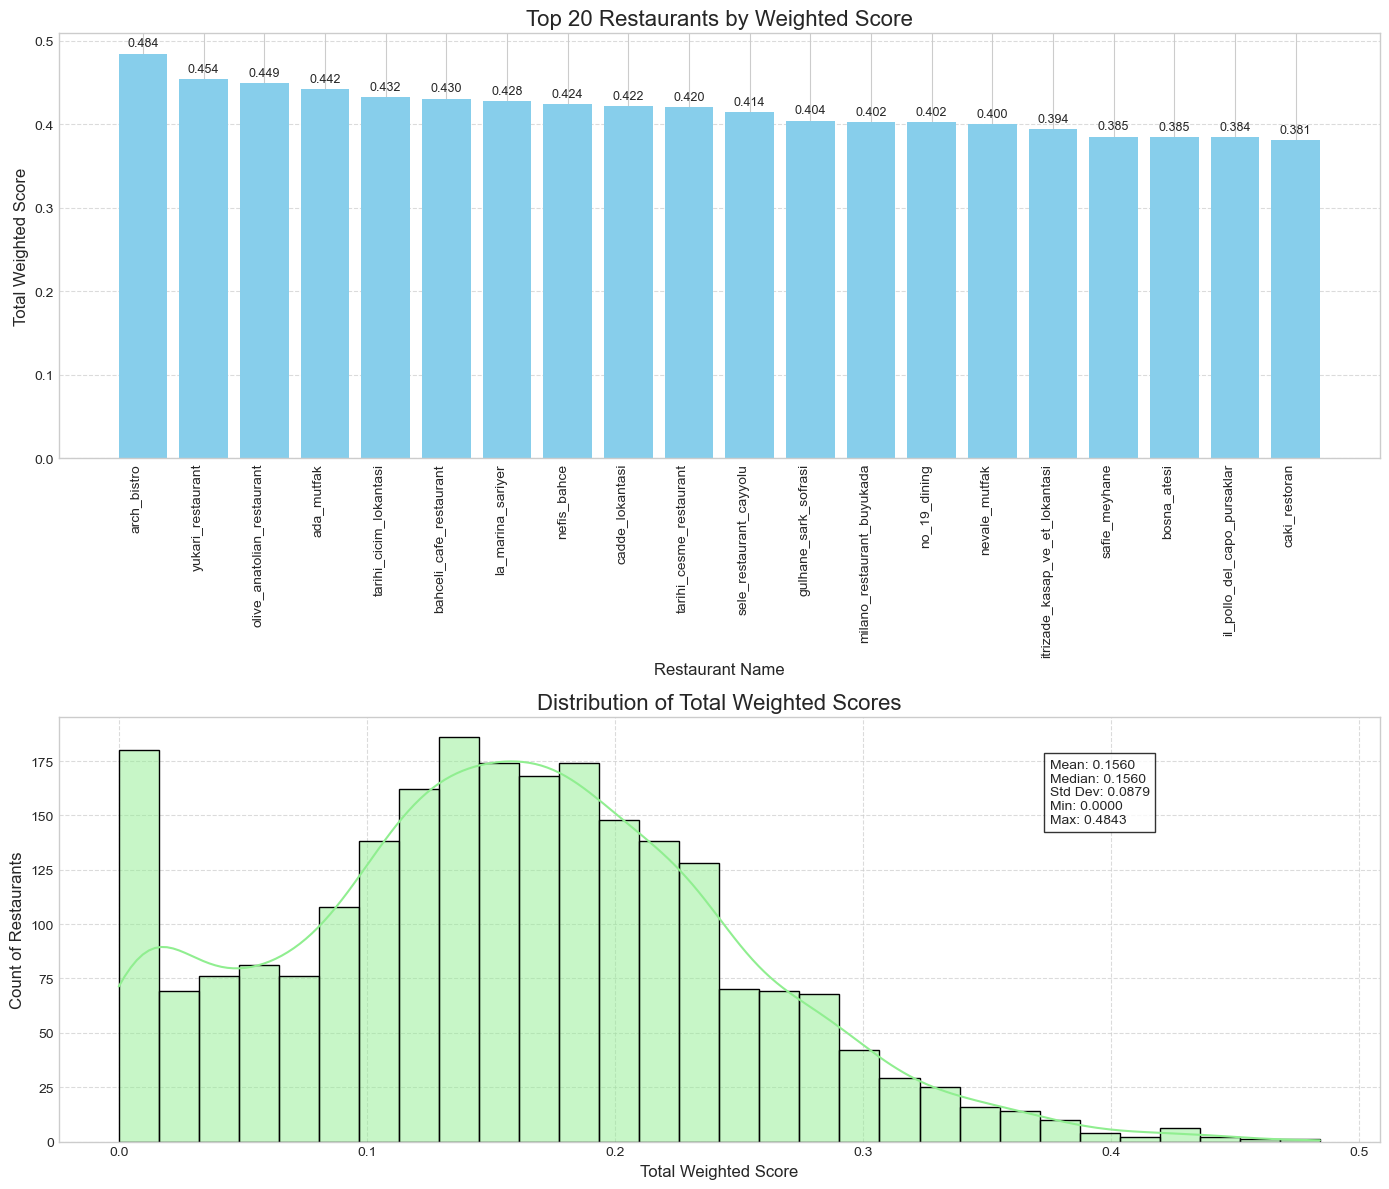

In [48]:
# Sort restaurants by their Total_Weighted_Score in descending order
sorted_restaurants = weight_calculation.sort_values('Total_Weighted_Score', ascending=False).reset_index(drop=True)

# Create a figure with two subplots
fig, axes = plt.subplots(2, 1, figsize=(14, 12))

# 1. Top 20 restaurants bar plot
top_20 = sorted_restaurants.head(20)
ax1 = axes[0]
bars = ax1.bar(top_20['Mekan_Adı'], top_20['Total_Weighted_Score'], color='skyblue')
ax1.set_title('Top 20 Restaurants by Weighted Score', fontsize=16)
ax1.set_xlabel('Restaurant Name', fontsize=12)
ax1.set_ylabel('Total Weighted Score', fontsize=12)
ax1.set_xticklabels(top_20['Mekan_Adı'], rotation=90, ha='right')
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 0.005,
             f'{height:.3f}', ha='center', va='bottom', fontsize=9)

# 2. Distribution of weighted scores
ax2 = axes[1]
sns.histplot(weight_calculation['Total_Weighted_Score'], bins=30, kde=True, ax=ax2, color='lightgreen')
ax2.set_title('Distribution of Total Weighted Scores', fontsize=16)
ax2.set_xlabel('Total Weighted Score', fontsize=12)
ax2.set_ylabel('Count of Restaurants', fontsize=12)
ax2.grid(linestyle='--', alpha=0.7)

# Add statistics
stats_text = (f"Mean: {weight_calculation['Total_Weighted_Score'].mean():.4f}\n"
              f"Median: {weight_calculation['Total_Weighted_Score'].median():.4f}\n"
              f"Std Dev: {weight_calculation['Total_Weighted_Score'].std():.4f}\n"
              f"Min: {weight_calculation['Total_Weighted_Score'].min():.4f}\n"
              f"Max: {weight_calculation['Total_Weighted_Score'].max():.4f}")
ax2.text(0.75, 0.75, stats_text, transform=ax2.transAxes, 
        bbox=dict(facecolor='white', alpha=0.8), fontsize=10)

plt.tight_layout()
plt.show()

In [49]:
weight_calculation.to_csv('/Users/Serra/Desktop/bitirme/kullanılan csvler/Serra.csv', index=False)